# Convolutional Neural Networks in Tensorflow
## Summary
- [**Week 1 - **](#week1)
  Applied `ImageDataGenerator`. A Keras API to load and prepare images in memory on demand. Used it to normalize and resize images to a common value. The generator automatically labels data depending on the folder structure.
  E.g.
  ```
  train/
      class1/
          img1.jpg
          img2.jpg
          ...
      class2/
          imgA.jpg
          ...
      ...
  ```
- **Week 2 - Data Augmentation**
  Use `ImageDataGenerator` *augmentation* capabilitites to counter overfitting. We can rotate, scale, flip, ... images (in memory) to simulate real live images. Consequently we can extract features e.g. in different orientations and improve on accuracy. 
- **Week 3 - Transfer Learning**
  Learned about *Transfer Learning*. Use a pretrained model (e.g. Interception) to use previously learned features. This tecnhique is usefule when we only have access to limit data or computat power.
- **Week 4 - Multiple Classes**
  Was about tecnical details of going from *binary classification* to *multiclass classification*:
  ```python
  flow_from_directory(
      ...
      class_mode='binary' -> 'categorical'
      ...
  )
  ...
  tf.keras.layers.Dense(1, activation='sigmoid') -> Dense(#categories, activation='softmax')
  ...
  compile(
      ...
      loss='binary_crossentropy' -> 'categorical_crossentropy'
      ...
  )

  ```

In [1]:
import os
import zipfile
import tensorflow as tf
import split_folders
import matplotlib.pyplot as plt

## <a name="week1"></a>Week 1 - ImageDataGenerator

## Donwload and unzip data

In [5]:
# !mkdir assets
# !wget --no-check-certificate \
#     "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
#     -O "./assets/cats-and-dogs.zip" \
#     -nv

local_zip = './assets/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./assets')
zip_ref.close();

### Split Images into Training, Validation and Testing Set

In [4]:
#split_folders.ratio('./assets/PetImages', output='./assets/PetImagesSplit', seed=1337, ratio=(.8, .1, .1))
split_folders.fixed('./assets/PetImages', output='./assets/PetImagesSplit', seed=1337, fixed=(100, 100), oversample=False)

In [5]:
print('total training cat images :', len(os.listdir('./assets/PetImagesSplit/train/Cat')))
print('total training dog images :', len(os.listdir('./assets/PetImagesSplit/train/Dog')))
print('total validation cat images :', len(os.listdir('./assets/PetImagesSplit/val/Cat')))

total training cat images : 12301
total training dog images : 12301
total validation cat images : 100


## Image Generators

In [2]:
train_dir = './assets/PetImagesSplit/train'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150))


val_dir = './assets/PetImagesSplit/val'
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150))

Found 3999 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

## Fit

In [6]:
history = model.fit_generator(train_generator,
                              validation_data=val_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=5,
                              verbose=2)

Epoch 1/15


100/100 - 26s - loss: 1.0948 - acc: 0.5535 - val_loss: 0.6567 - val_acc: 0.6100


Epoch 2/15


100/100 - 26s - loss: 0.6663 - acc: 0.6153 - val_loss: 0.6302 - val_acc: 0.7300


Epoch 3/15


100/100 - 25s - loss: 0.5718 - acc: 0.7254 - val_loss: 0.5650 - val_acc: 0.8100


Epoch 4/15


100/100 - 28s - loss: 0.5382 - acc: 0.7380 - val_loss: 0.5379 - val_acc: 0.7700


Epoch 5/15


100/100 - 29s - loss: 0.3997 - acc: 0.8280 - val_loss: 0.5886 - val_acc: 0.7100


Epoch 6/15


100/100 - 29s - loss: 0.4279 - acc: 0.7909 - val_loss: 0.5572 - val_acc: 0.6400


Epoch 7/15


100/100 - 30s - loss: 0.2610 - acc: 0.9000 - val_loss: 0.5446 - val_acc: 0.7100


Epoch 8/15


100/100 - 29s - loss: 0.2569 - acc: 0.8909 - val_loss: 0.5396 - val_acc: 0.7300


Epoch 9/15


100/100 - 28s - loss: 0.1251 - acc: 0.9620 - val_loss: 0.8476 - val_acc: 0.7000


Epoch 10/15


100/100 - 27s - loss: 0.1618 - acc: 0.9420 - val_loss: 0.7111 - val_acc: 0.7700


Epoch 11/15


100/100 - 27s - loss: 0.1137 - acc: 0.9695 - val_loss: 1.1232 - val_acc: 0.6400


Epoch 12/15


100/100 - 27s - loss: 0.0961 - acc: 0.9695 - val_loss: 0.6938 - val_acc: 0.7500


Epoch 13/15


100/100 - 28s - loss: 0.0523 - acc: 0.9895 - val_loss: 0.7163 - val_acc: 0.7600


Epoch 14/15


100/100 - 30s - loss: 0.0405 - acc: 0.9895 - val_loss: 0.8134 - val_acc: 0.7600


Epoch 15/15


100/100 - 28s - loss: 0.0226 - acc: 0.9975 - val_loss: 1.0271 - val_acc: 0.7800


### Analyse History

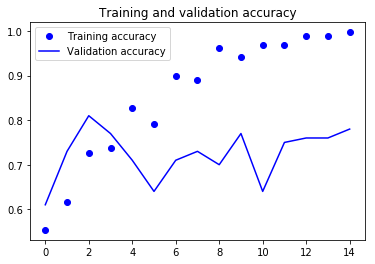

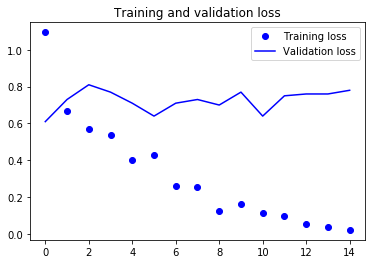

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Week 2: Image Augmentation (Overfitting)

In [22]:
train_dir = './assets/PetImagesSplit/train'
train_datagen2 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator2 = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150),
) 

Found 3999 images belonging to 2 classes.


In [23]:
history2 = model.fit_generator(train_generator2,
                              validation_data=val_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=5,
                              verbose=2)

Epoch 1/15


100/100 - 33s - loss: 0.6445 - acc: 0.6288 - val_loss: 0.5922 - val_acc: 0.7200


Epoch 2/15


100/100 - 32s - loss: 0.6366 - acc: 0.6545 - val_loss: 0.6316 - val_acc: 0.6300


Epoch 3/15


100/100 - 27s - loss: 0.6273 - acc: 0.6478 - val_loss: 0.5483 - val_acc: 0.7100


Epoch 4/15


100/100 - 29s - loss: 0.6185 - acc: 0.6700 - val_loss: 0.5592 - val_acc: 0.7500


Epoch 5/15


100/100 - 31s - loss: 0.6320 - acc: 0.6420 - val_loss: 0.5760 - val_acc: 0.7100


Epoch 6/15


100/100 - 31s - loss: 0.6292 - acc: 0.6578 - val_loss: 0.5794 - val_acc: 0.6800


Epoch 7/15


100/100 - 30s - loss: 0.6195 - acc: 0.6555 - val_loss: 0.5387 - val_acc: 0.6800


Epoch 8/15


100/100 - 27s - loss: 0.5975 - acc: 0.6733 - val_loss: 0.5208 - val_acc: 0.7500


Epoch 9/15


100/100 - 27s - loss: 0.5967 - acc: 0.6783 - val_loss: 0.5405 - val_acc: 0.7400


Epoch 10/15


100/100 - 27s - loss: 0.6141 - acc: 0.6590 - val_loss: 0.5213 - val_acc: 0.8100


Epoch 11/15


100/100 - 32s - loss: 0.5850 - acc: 0.6885 - val_loss: 0.5055 - val_acc: 0.7800


Epoch 12/15


100/100 - 32s - loss: 0.5878 - acc: 0.6928 - val_loss: 0.5163 - val_acc: 0.7800


Epoch 13/15


100/100 - 29s - loss: 0.5969 - acc: 0.6965 - val_loss: 0.4695 - val_acc: 0.7900


Epoch 14/15


100/100 - 28s - loss: 0.5928 - acc: 0.6868 - val_loss: 0.5536 - val_acc: 0.7200


Epoch 15/15


100/100 - 25s - loss: 0.5781 - acc: 0.6948 - val_loss: 0.5045 - val_acc: 0.7500


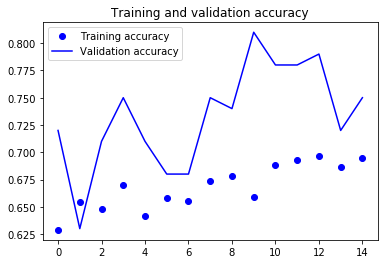

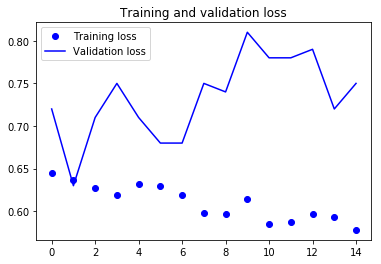

In [24]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Week 3: Transfer Learning (Inception Model)
### Download and Prepare Pretrained Model

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O ./assets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-11-07 08:41:09--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.211.48
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.211.48|:443... connected.


HTTP request sent, awaiting response... 

200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘./assets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

          ./assets/   0%[                    ]       0  --.-KB/s               

         ./assets/i   0%[                    ] 367.08K  1.69MB/s               

        ./assets/in   1%[                    ] 905.66K  2.14MB/s               

       ./assets/inc   1%[                    ]   1.38M  2.21MB/s               

      ./assets/ince   2%[                    ]   1.88M  2.28MB/s               

     ./assets/incep   2%[                    ]   2.41M  2.33MB/s               

    ./assets/incept   3%[                    ]   2.97M  2.37MB/s               

   ./assets/incepti   4%[                    ]   3.60M  2.41MB/s               

  ./assets/inceptio   5%[>                   ]   4.21M  2.48MB/s               

 ./assets/inception   5%[>                   ]   4.82M  2.53MB/s               

./assets/inception_   6%[>                   ]   5.30M  2.51MB/s               

/assets/inception_v   7%[>                   ]   5.90M  2.55MB/s               

assets/inception_v3   7%[>                   ]   6.43M  2.54MB/s               

ssets/inception_v3_   8%[>                   ]   6.94M  2.53MB/s               

sets/inception_v3_w   9%[>                   ]   7.60M  2.55MB/s               

ets/inception_v3_we   9%[>                   ]   8.07M  2.53MB/s    eta 30s    

ts/inception_v3_wei  10%[=>                  ]   8.65M  2.58MB/s    eta 30s    

s/inception_v3_weig  10%[=>                  ]   9.21M  2.63MB/s    eta 30s    

/inception_v3_weigh  11%[=>                  ]   9.79M  2.65MB/s    eta 30s    

inception_v3_weight  12%[=>                  ]  10.29M  2.64MB/s    eta 30s    

nception_v3_weights  12%[=>                  ]  10.77M  2.63MB/s    eta 29s    

ception_v3_weights_  13%[=>                  ]  11.33M  2.64MB/s    eta 29s    

eption_v3_weights_t  14%[=>                  ]  11.94M  2.60MB/s    eta 29s    

ption_v3_weights_tf  15%[==>                 ]  12.62M  2.68MB/s    eta 29s    

tion_v3_weights_tf_  15%[==>                 ]  13.16M  2.66MB/s    eta 29s    

ion_v3_weights_tf_d  16%[==>                 ]  13.72M  2.69MB/s    eta 27s    

on_v3_weights_tf_di  17%[==>                 ]  14.37M  2.73MB/s    eta 27s    

n_v3_weights_tf_dim  17%[==>                 ]  14.88M  2.68MB/s    eta 27s    

_v3_weights_tf_dim_  18%[==>                 ]  15.47M  2.71MB/s    eta 27s    

v3_weights_tf_dim_o  19%[==>                 ]  16.15M  2.73MB/s    eta 27s    

3_weights_tf_dim_or  19%[==>                 ]  16.74M  2.75MB/s    eta 25s    

_weights_tf_dim_ord  20%[===>                ]  17.16M  2.74MB/s    eta 25s    

weights_tf_dim_orde  20%[===>                ]  17.52M  2.65MB/s    eta 25s    

eights_tf_dim_order  21%[===>                ]  17.90M  2.60MB/s    eta 25s    

ights_tf_dim_orderi  21%[===>                ]  18.33M  2.55MB/s    eta 25s    

ghts_tf_dim_orderin  21%[===>                ]  18.38M  2.37MB/s    eta 26s    

hts_tf_dim_ordering  22%[===>                ]  18.71M  2.31MB/s    eta 26s    

ts_tf_dim_ordering_  22%[===>                ]  18.93M  2.22MB/s    eta 26s    

s_tf_dim_ordering_t  23%[===>                ]  19.49M  2.17MB/s    eta 26s    

_tf_dim_ordering_tf  23%[===>                ]  19.93M  2.12MB/s    eta 26s    

tf_dim_ordering_tf_  24%[===>                ]  20.58M  2.16MB/s    eta 26s    

f_dim_ordering_tf_k  25%[====>               ]  20.99M  2.10MB/s    eta 26s    

_dim_ordering_tf_ke  25%[====>               ]  21.32M  2.00MB/s    eta 26s    

dim_ordering_tf_ker  26%[====>               ]  21.80M  1.98MB/s    eta 26s    

im_ordering_tf_kern  26%[====>               ]  22.32M  1.97MB/s    eta 26s    

m_ordering_tf_kerne  27%[====>               ]  22.80M  1.89MB/s    eta 26s    

_ordering_tf_kernel  27%[====>               ]  23.26M  1.88MB/s    eta 26s    

ordering_tf_kernels  28%[====>               ]  23.83M  1.93MB/s    eta 26s    

rdering_tf_kernels_  29%[====>               ]  24.44M  1.99MB/s    eta 26s    

dering_tf_kernels_n  29%[====>               ]  25.12M  2.11MB/s    eta 26s    

ering_tf_kernels_no  30%[=====>              ]  25.52M  2.10MB/s    eta 24s    

ring_tf_kernels_not  30%[=====>              ]  25.63M  2.14MB/s    eta 24s    

ing_tf_kernels_noto  30%[=====>              ]  25.97M  2.14MB/s    eta 24s    

ng_tf_kernels_notop  31%[=====>              ]  26.40M  2.20MB/s    eta 24s    

g_tf_kernels_notop.  32%[=====>              ]  26.87M  2.22MB/s    eta 24s    

_tf_kernels_notop.h  32%[=====>              ]  27.33M  2.23MB/s    eta 24s    

tf_kernels_notop.h5  33%[=====>              ]  27.83M  2.19MB/s    eta 24s    

f_kernels_notop.h5   33%[=====>              ]  28.37M  2.25MB/s    eta 24s    

_kernels_notop.h5    34%[=====>              ]  29.02M  2.34MB/s    eta 24s    

kernels_notop.h5     35%[======>             ]  29.62M  2.37MB/s    eta 24s    

ernels_notop.h5      35%[======>             ]  30.18M  2.37MB/s    eta 22s    

rnels_notop.h5       36%[======>             ]  30.79M  2.43MB/s    eta 22s    

nels_notop.h5        37%[======>             ]  31.37M  2.48MB/s    eta 22s    

els_notop.h5         38%[======>             ]  31.93M  2.43MB/s    eta 22s    

ls_notop.h5          38%[======>             ]  32.52M  2.42MB/s    eta 22s    

s_notop.h5           39%[======>             ]  33.05M  2.39MB/s    eta 21s    

_notop.h5            40%[=======>            ]  33.58M  2.51MB/s    eta 21s    

notop.h5             40%[=======>            ]  34.19M  2.61MB/s    eta 21s    

otop.h5              41%[=======>            ]  34.83M  2.67MB/s    eta 21s    

top.h5               42%[=======>            ]  35.44M  2.71MB/s    eta 21s    

op.h5                43%[=======>            ]  36.05M  2.75MB/s    eta 20s    

p.h5                 43%[=======>            ]  36.62M  2.76MB/s    eta 20s    

.h5                  44%[=======>            ]  37.10M  2.77MB/s    eta 20s    

h5                   44%[=======>            ]  37.69M  2.77MB/s    eta 20s    

5                    45%[========>           ]  38.32M  2.77MB/s    eta 20s    

                     46%[========>           ]  38.85M  2.75MB/s    eta 18s    

                  .  46%[========>           ]  39.29M  2.68MB/s    eta 18s    

                 ./  47%[========>           ]  39.68M  2.64MB/s    eta 18s    

                ./a  47%[========>           ]  40.13M  2.57MB/s    eta 18s    

               ./as  48%[========>           ]  40.71M  2.54MB/s    eta 18s    

              ./ass  49%[========>           ]  41.19M  2.55MB/s    eta 18s    

             ./asse  49%[========>           ]  41.62M  2.50MB/s    eta 18s    

            ./asset  50%[=========>          ]  42.01M  2.44MB/s    eta 18s    

           ./assets  50%[=========>          ]  42.43M  2.38MB/s    eta 18s    

          ./assets/  51%[=========>          ]  42.87M  2.34MB/s    eta 18s    

         ./assets/i  51%[=========>          ]  43.35M  2.24MB/s    eta 17s    

        ./assets/in  52%[=========>          ]  43.93M  2.25MB/s    eta 17s    

       ./assets/inc  52%[=========>          ]  44.40M  2.22MB/s    eta 17s    

      ./assets/ince  53%[=========>          ]  44.90M  2.22MB/s    eta 17s    

     ./assets/incep  54%[=========>          ]  45.35M  2.18MB/s    eta 17s    

    ./assets/incept  54%[=========>          ]  45.74M  2.11MB/s    eta 16s    

   ./assets/incepti  55%[==========>         ]  46.35M  2.17MB/s    eta 16s    

  ./assets/inceptio  55%[==========>         ]  46.90M  2.24MB/s    eta 16s    

 ./assets/inception  56%[==========>         ]  47.43M  2.26MB/s    eta 16s    

./assets/inception_  57%[==========>         ]  47.88M  2.24MB/s    eta 16s    

/assets/inception_v  57%[==========>         ]  48.38M  2.26MB/s    eta 15s    

assets/inception_v3  58%[==========>         ]  48.87M  2.27MB/s    eta 15s    

ssets/inception_v3_  58%[==========>         ]  49.35M  2.31MB/s    eta 15s    

sets/inception_v3_w  59%[==========>         ]  49.69M  2.30MB/s    eta 15s    

ets/inception_v3_we  59%[==========>         ]  50.02M  2.26MB/s    eta 15s    

ts/inception_v3_wei  60%[===========>        ]  50.37M  2.20MB/s    eta 14s    

s/inception_v3_weig  60%[===========>        ]  50.60M  2.12MB/s    eta 14s    

/inception_v3_weigh  60%[===========>        ]  50.82M  2.05MB/s    eta 14s    

inception_v3_weight  61%[===========>        ]  51.18M  2.00MB/s    eta 14s    

nception_v3_weights  61%[===========>        ]  51.62M  1.97MB/s    eta 14s    

ception_v3_weights_  62%[===========>        ]  52.15M  2.02MB/s    eta 13s    

eption_v3_weights_t  62%[===========>        ]  52.77M  2.10MB/s    eta 13s    

ption_v3_weights_tf  63%[===========>        ]  53.21M  2.03MB/s    eta 13s    

tion_v3_weights_tf_  64%[===========>        ]  53.85M  2.08MB/s    eta 13s    

ion_v3_weights_tf_d  64%[===========>        ]  54.40M  2.09MB/s    eta 13s    

on_v3_weights_tf_di  65%[============>       ]  55.01M  2.12MB/s    eta 12s    

n_v3_weights_tf_dim  66%[============>       ]  55.54M  2.13MB/s    eta 12s    

_v3_weights_tf_dim_  66%[============>       ]  55.93M  2.10MB/s    eta 12s    

v3_weights_tf_dim_o  67%[============>       ]  56.54M  2.15MB/s    eta 12s    

3_weights_tf_dim_or  67%[============>       ]  56.80M  2.16MB/s    eta 12s    

_weights_tf_dim_ord  68%[============>       ]  57.08M  2.12MB/s    eta 11s    

weights_tf_dim_orde  68%[============>       ]  57.52M  2.15MB/s    eta 11s    

eights_tf_dim_order  69%[============>       ]  58.18M  2.35MB/s    eta 11s    

ights_tf_dim_orderi  70%[=============>      ]  58.72M  2.38MB/s    eta 11s    

ghts_tf_dim_orderin  70%[=============>      ]  59.13M  2.40MB/s    eta 11s    

hts_tf_dim_ordering  71%[=============>      ]  59.65M  2.41MB/s    eta 10s    

ts_tf_dim_ordering_  71%[=============>      ]  60.29M  2.43MB/s    eta 10s    

s_tf_dim_ordering_t  72%[=============>      ]  60.88M  2.43MB/s    eta 10s    

_tf_dim_ordering_tf  73%[=============>      ]  61.57M  2.50MB/s    eta 10s    

tf_dim_ordering_tf_  74%[=============>      ]  62.19M  2.51MB/s    eta 10s    

f_dim_ordering_tf_k  74%[=============>      ]  62.74M  2.48MB/s    eta 9s     

_dim_ordering_tf_ke  75%[==============>     ]  63.27M  2.47MB/s    eta 9s     

dim_ordering_tf_ker  76%[==============>     ]  63.88M  2.55MB/s    eta 9s     

im_ordering_tf_kern  76%[==============>     ]  64.43M  2.52MB/s    eta 9s     

m_ordering_tf_kerne  77%[==============>     ]  65.02M  2.55MB/s    eta 9s     

_ordering_tf_kernel  78%[==============>     ]  65.51M  2.60MB/s    eta 8s     

ordering_tf_kernels  78%[==============>     ]  66.15M  2.78MB/s    eta 8s     

rdering_tf_kernels_  79%[==============>     ]  66.69M  2.76MB/s    eta 8s     

dering_tf_kernels_n  80%[===============>    ]  67.18M  2.70MB/s    eta 8s     

ering_tf_kernels_no  80%[===============>    ]  67.71M  2.74MB/s    eta 8s     

ring_tf_kernels_not  81%[===============>    ]  68.25M  2.76MB/s    eta 6s     

ing_tf_kernels_noto  81%[===============>    ]  68.69M  2.76MB/s    eta 6s     

ng_tf_kernels_notop  82%[===============>    ]  69.37M  2.75MB/s    eta 6s     

g_tf_kernels_notop.  83%[===============>    ]  69.91M  2.74MB/s    eta 6s     

_tf_kernels_notop.h  84%[===============>    ]  70.58M  2.72MB/s    eta 6s     

tf_kernels_notop.h5  84%[===============>    ]  71.24M  2.75MB/s    eta 5s     

f_kernels_notop.h5   85%[================>   ]  71.71M  2.73MB/s    eta 5s     

_kernels_notop.h5    86%[================>   ]  72.37M  2.78MB/s    eta 5s     

kernels_notop.h5     86%[================>   ]  72.90M  2.74MB/s    eta 5s     

ernels_notop.h5      87%[================>   ]  73.55M  2.77MB/s    eta 5s     

rnels_notop.h5       88%[================>   ]  74.21M  2.82MB/s    eta 4s     

nels_notop.h5        89%[================>   ]  74.69M  2.78MB/s    eta 4s     

els_notop.h5         89%[================>   ]  75.27M  2.80MB/s    eta 4s     

ls_notop.h5          90%[=================>  ]  75.82M  2.81MB/s    eta 4s     

s_notop.h5           91%[=================>  ]  76.32M  2.81MB/s    eta 4s     

_notop.h5            91%[=================>  ]  77.01M  2.84MB/s    eta 3s     

notop.h5             92%[=================>  ]  77.63M  2.86MB/s    eta 3s     

otop.h5              93%[=================>  ]  78.18M  2.85MB/s    eta 3s     

top.h5               93%[=================>  ]  78.62M  2.72MB/s    eta 3s     

op.h5                94%[=================>  ]  78.87M  2.64MB/s    eta 3s     

p.h5                 94%[=================>  ]  79.33M  2.59MB/s    eta 2s     

.h5                  95%[==================> ]  79.76M  2.56MB/s    eta 2s     

h5                   95%[==================> ]  80.26M  2.48MB/s    eta 2s     

5                    96%[==================> ]  80.77M  2.48MB/s    eta 2s     

                     97%[==================> ]  81.38M  2.44MB/s    eta 2s     

                  .  97%[==================> ]  81.74M  2.37MB/s    eta 1s     

                 ./  98%[==================> ]  82.40M  2.41MB/s    eta 1s     

                ./a  98%[==================> ]  82.87M  2.38MB/s    eta 1s     

               ./as  99%[==================> ]  83.21M  2.34MB/s    eta 1s     

              ./ass  99%[==================> ]  83.55M  2.28MB/s    eta 1s     

./assets/inception_ 100%[===================>]  83.84M  2.20MB/s    in 35s     

2019-11-07 08:41:44 (2.42 MB/s) - ‘./assets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [7]:
local_weights_file = './assets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape = (150, 150, 3),
    include_top = False,
    weights = None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False;

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

### Model

In [13]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
train_dir = './assets/PetImagesSplit/train'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150))


val_dir = './assets/PetImagesSplit/val'
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150))

Found 3999 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [14]:
history3 = model.fit_generator(train_generator,
                              validation_data=val_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=10,
                              verbose=2)

Epoch 1/15


100/100 - 193s - loss: 0.4844 - acc: 0.8365 - val_loss: 0.2369 - val_acc: 0.9600


Epoch 2/15


100/100 - 190s - loss: 0.3224 - acc: 0.8709 - val_loss: 0.5927 - val_acc: 0.8800


Epoch 3/15


100/100 - 188s - loss: 0.1287 - acc: 0.9485 - val_loss: 0.5741 - val_acc: 0.9150


Epoch 4/15


100/100 - 188s - loss: 0.1691 - acc: 0.9390 - val_loss: 0.3813 - val_acc: 0.9400


Epoch 5/15


100/100 - 200s - loss: 0.0884 - acc: 0.9640 - val_loss: 0.6936 - val_acc: 0.9150


Epoch 6/15


100/100 - 196s - loss: 0.1128 - acc: 0.9525 - val_loss: 0.3991 - val_acc: 0.9300


Epoch 7/15


100/100 - 192s - loss: 0.0688 - acc: 0.9810 - val_loss: 0.6708 - val_acc: 0.9150


Epoch 8/15


100/100 - 203s - loss: 0.0924 - acc: 0.9655 - val_loss: 0.6836 - val_acc: 0.9300


Epoch 9/15


100/100 - 193s - loss: 0.0511 - acc: 0.9785 - val_loss: 0.6887 - val_acc: 0.9300


Epoch 10/15


100/100 - 199s - loss: 0.1143 - acc: 0.9655 - val_loss: 0.3316 - val_acc: 0.9550


Epoch 11/15


100/100 - 216s - loss: 0.0771 - acc: 0.9800 - val_loss: 0.5250 - val_acc: 0.9300


Epoch 12/15


100/100 - 217s - loss: 0.0489 - acc: 0.9790 - val_loss: 0.4443 - val_acc: 0.9450


Epoch 13/15


100/100 - 210s - loss: 0.0396 - acc: 0.9870 - val_loss: 0.4451 - val_acc: 0.9400


Epoch 14/15


100/100 - 212s - loss: 0.0734 - acc: 0.9780 - val_loss: 0.4551 - val_acc: 0.9500


Epoch 15/15


100/100 - 212s - loss: 0.0753 - acc: 0.9730 - val_loss: 0.4984 - val_acc: 0.9500


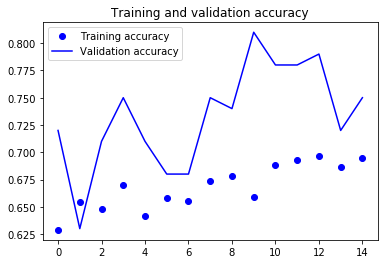

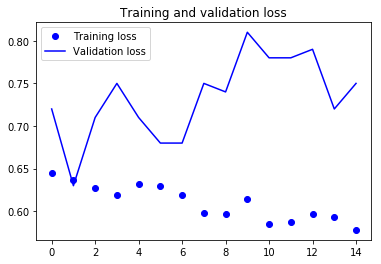

In [ ]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()